In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

plt.rcParams['figure.figsize']=[50,30]
plt.rcParams['font.size']=22
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

# Analyze Epidemics Mortality Rate

## SARS

In [308]:
# import sars time series and drop URL column
sars_ts = pd.read_excel('data/SARS.xlsx', usecols=list(range(4)), parse_dates=[1]).set_index('Date', drop=True)

In [309]:
sars_ts = sars_ts.resample('W').mean()

## Estimate Hazard Rate

### Calculate $\alpha_{SARS}$

First, we must calculate the survival rate $S_{SARS}$ from our data. A value of $91.21\%$ is in line with the rate in [this paper](doi:10.1016/j.socscimed.2006.08.004) (as per Wikipedia, as I have no access to the paper). 

In [310]:
S = 1 - sars_ts.iloc[-1]['Mortality'] / (sars_ts.iloc[-1]['Infected'] + sars_ts.iloc[-1]['Mortality'])
S

0.912186999956753

### Brute Force Optimization

Drop negative diffs caused by reclassification / discarded cases.

In [327]:
X = sars_ts['Infected'].diff().where(lambda x: x >= 0).fillna(0).values

In [328]:
d = sars_ts['Mortality'].diff().where(lambda x: x >= 0).fillna(0).values

In [329]:
X

array([   0.        ,  836.16666667,  996.5       ,  656.16666667,
        592.5       ,  973.33333333, 1384.66666667, 1236.16666667,
        679.5       ,  370.16666667,  265.33333333,  125.7       ,
         38.8       ,   25.4       ,    0.        ,    0.        ,
          0.        ])

New minimum 1201.713666442582 for (K=1,alpha=0.0868868868868869)
New minimum 636.4382680775335 for (K=2,alpha=0.044444444444444446)
New minimum 373.71789686522146 for (K=3,alpha=0.029829829829829832)
New minimum 266.10805430159724 for (K=4,alpha=0.022522522522522525)
New minimum 220.45876599800476 for (K=5,alpha=0.018018018018018018)
New minimum 205.22695836034856 for (K=6,alpha=0.015115115115115116)


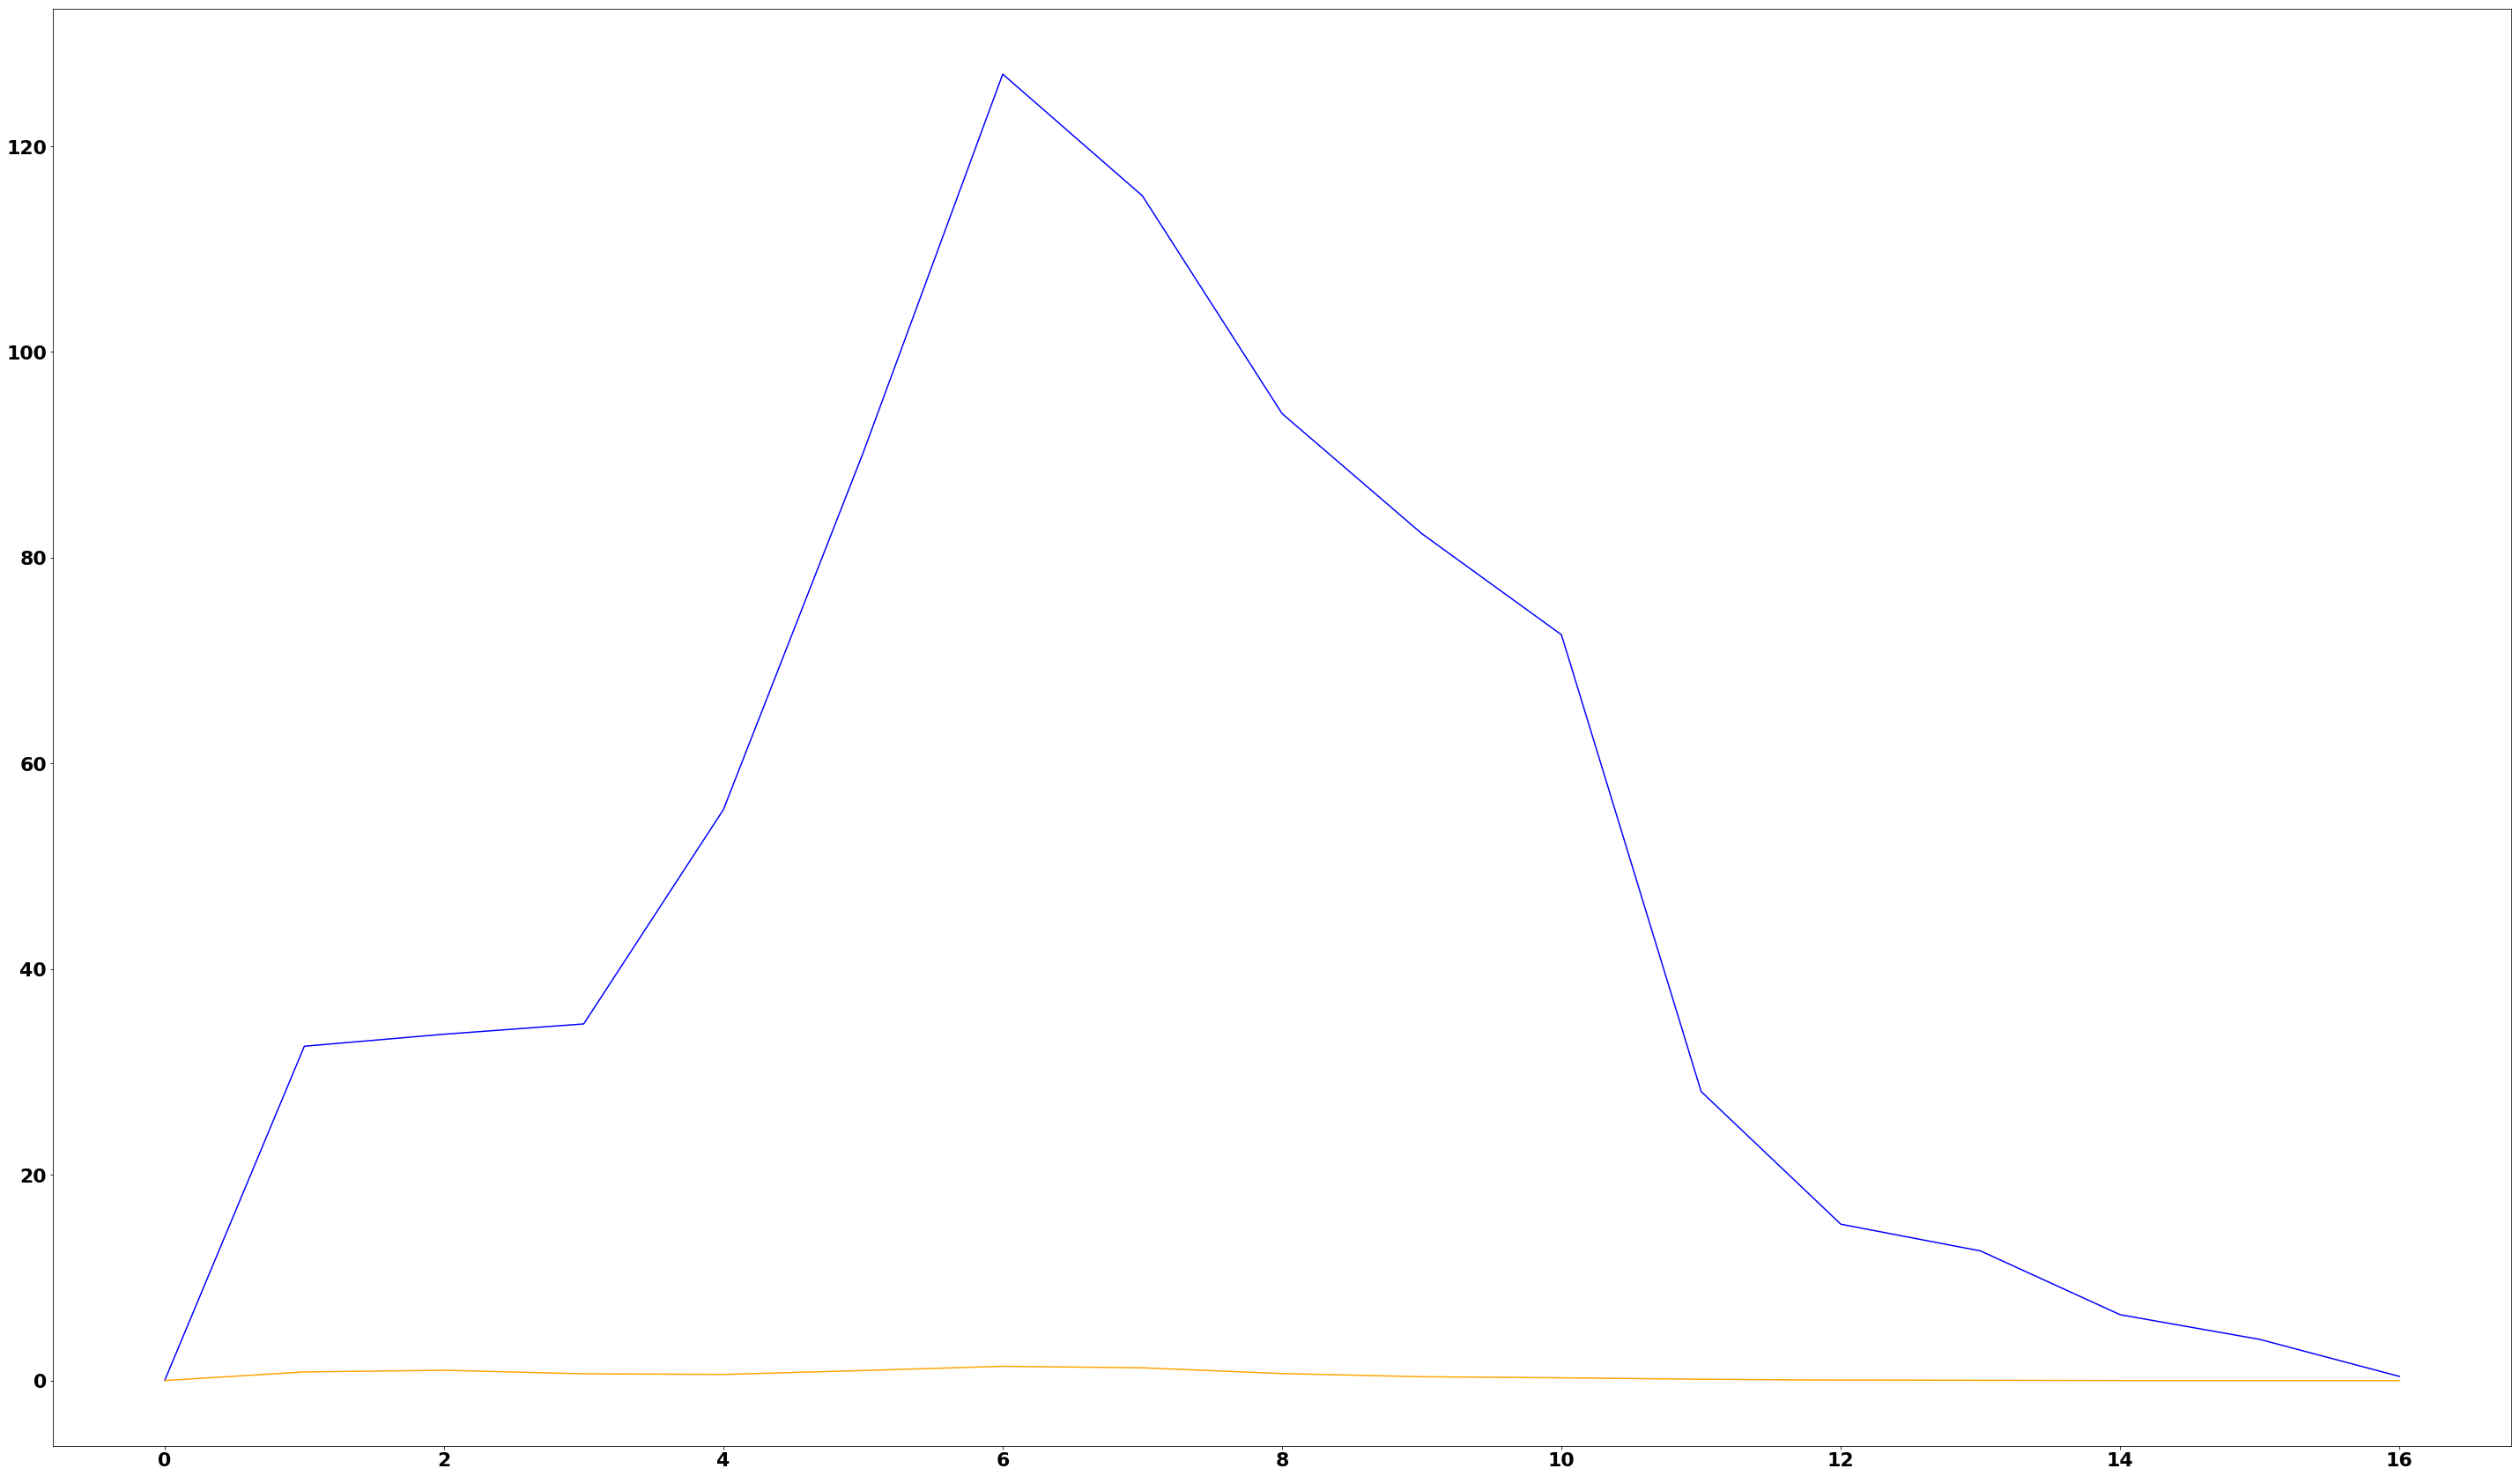

In [341]:
alpha_space = np.linspace(0, 0.1, 1000)
K_space = range(100)

epsillon = 0.001

minimum_distance = None

T = X.size
d_hat = np.zeros(T)

for K in K_space:
    for alpha in alpha_space:
        # Survivability Condition
        if np.abs(((1 - alpha) ** K) - S) > epsillon: 
            continue

        d_hat = np.zeros(T)

        for t in range(T):
            if t - K > 0:
                d_hat[t] = sum(((1 - alpha) ** k) * X[t - k] for k in range(t-K + 1))
            else:
                # is this correct?
                d_hat[t] = X[t]
                
        d_hat *= alpha
        
        distance = np.linalg.norm(d - d_hat)

        if minimum_distance is None or distance < minimum_distance:
            minimum_distance = distance
            print(f"New minimum {minimum_distance} for (K={K},alpha={alpha})")

plt.plot(d, color='blue')
plt.plot(d_hat, color='orange')
plt.show()

## MERS

In [280]:
mers_ts = pd.read_csv('data/MERS/MERS_middle_east_timeline.csv', parse_dates=[0], index_col=0)

In [281]:
# corrected_mers_ts = mers_ts.reindex(pd.date_range(min(mers_ts.index), max(mers_ts.index)))

In [286]:
adjusted_mers_ts = mers_ts.resample('W').mean().fillna(method='ffill')

In [287]:
adjusted_mers_ts

,Infected,Dead
2016-12-25,2.000000,0.000000
2017-01-01,5.333333,0.000000
2017-01-08,12.000000,2.000000
2017-01-15,16.500000,4.750000
2017-01-22,21.000000,5.000000
2017-01-29,24.250000,5.250000
2017-02-05,28.000000,7.200000
2017-02-12,34.800000,11.000000
2017-02-19,39.200000,13.800000
2017-02-26,43.000000,15.666667


In [288]:
X = adjusted_mers_ts['Infected']
d = adjusted_mers_ts['Dead']

In [289]:
optimize(X, d)

New minimum 2407.1177640136193 for (K=1,alpha=0.07807807807807808)
New minimum 2037.5083391761573 for (K=2,alpha=0.04004004004004004)
New minimum 1722.5169781858247 for (K=3,alpha=0.02702702702702703)
New minimum 1484.288167257085 for (K=4,alpha=0.02102102102102102)
New minimum 1268.4031530587429 for (K=5,alpha=0.017017017017017015)
New minimum 1064.4178210645834 for (K=6,alpha=0.014014014014014014)
New minimum 903.3623515214942 for (K=7,alpha=0.012012012012012012)
New minimum 814.2032094026268 for (K=8,alpha=0.011011011011011011)
New minimum 620.9225617303892 for (K=9,alpha=0.009009009009009009)
New minimum 620.2277890920642 for (K=10,alpha=0.009009009009009009)
New minimum 518.0712805074119 for (K=11,alpha=0.008008008008008008)
New minimum 418.43098890996754 for (K=12,alpha=0.007007007007007007)
New minimum 418.38671154161295 for (K=13,alpha=0.007007007007007007)
New minimum 335.8903549175183 for (K=14,alpha=0.006006006006006006)
New minimum 304.6705174018892 for (K=17,alpha=0.005005

ValueError: view limit minimum -36869.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units